Association rules are one of the important machine learning techniques used in market market analysis and recommendation systems. The relationship of the users will be observed by examining the relationship and actions are implemented in these observations. For example; Like movies and TV shows on Netflix, recommended products while shopping on Amazon, other daily mixes based on songs listened to on Spotify. Spitting is all done to increase ranks such as selling, watching and resting.

Many algorithms are used for association rules, the most popular of which is the Apriori Algorithm.

There are 3 important concepts we need to know in the Apriori algorithm; Support, Confidence, and Lift.

Let X and Y represent the products in the market, and N denote the total number of products.

Support: Indicates how often X and Y are seen together.

Support(X, Y) = Freq(X,Y)/N
Confidence: Indicates the probability that a customer who buys product X will buy product Y.

Confidence(X, Y) = Freq(X,Y) / Freq(X)
Lift: Indicates how much the sales of Y product increased when product X was purchased.

Lift = Support (X, Y) / ( Support(X) * Support(Y) )

Dataset link: https://www.kaggle.com/datasets/burakbuyukyagmur/grocey-store-dataset

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

Let's load the dataset

In [3]:
grocery = pd.read_csv('./GroceryStoreDataSet.csv', names = ['Products'], sep = ',')

Finding first 5 and last 5 records

In [4]:
grocery.head()

,Products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [5]:
grocery.tail(5)

,Products
15,"COFFEE,SUGER,CORNFLAKES"
16,"BREAD,SUGER,BOURNVITA"
17,"BREAD,COFFEE,SUGER"
18,"BREAD,COFFEE,SUGER"
19,"TEA,MILK,COFFEE,CORNFLAKES"


In [6]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [7]:
grocery.describe()

,Products
count,20
unique,17
top,"COFFEE,COCK,BISCUIT,CORNFLAKES"
freq,2


In [8]:
grocery.shape

(20, 1)

Here we come to know that, there are no null records. Total 20 records are present in one single columns.

In [9]:
grocery_df = list(grocery["Products"].apply(lambda x:x.split(",") ))
grocery_df

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

Here, we have split the products and create a list.

Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list. Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.

In [10]:
te = TransactionEncoder()
te_data = te.fit(grocery_df).transform(grocery_df)
gdf = pd.DataFrame(te_data, columns = te.columns_)
gdf = gdf.replace(False,0)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


In [11]:
gdf = gdf.replace(True,1)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


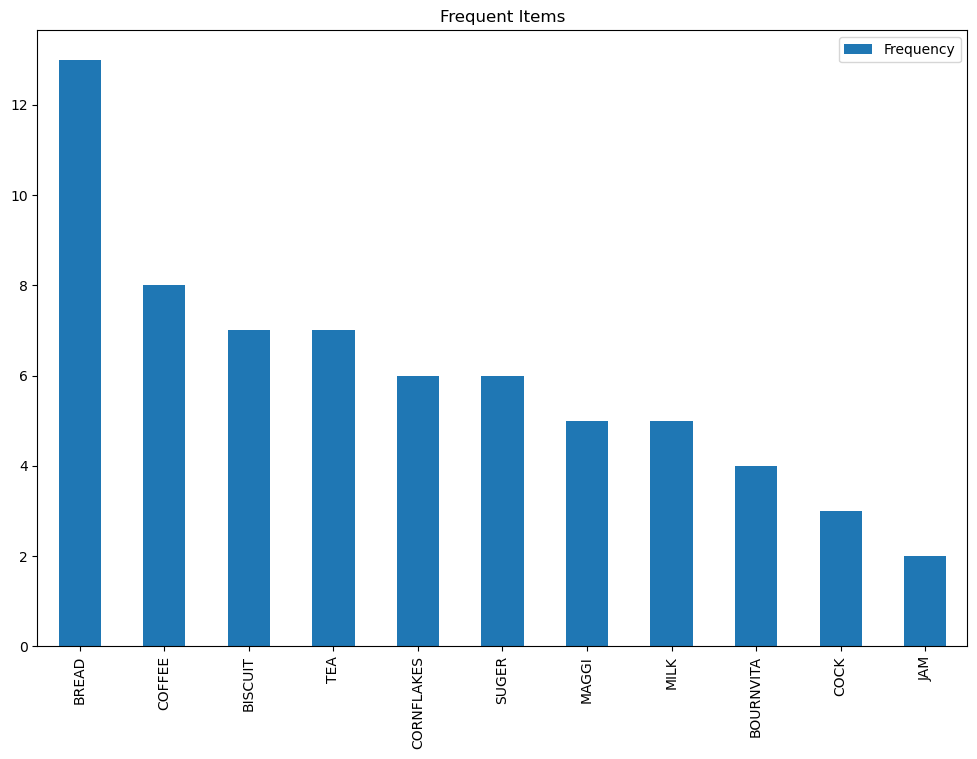

In [12]:
gdf.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

Applying Apriori Algorithm

In the next step, we are applying Apriori algrithm. For this data set, we'll set a min_support value with a threshold value of 20% and printed them on the screen as well.

In [13]:
gdf1 = apriori(gdf, min_support = 0.2, use_colnames = True, verbose = 1)
gdf1

Processing 42 combinations | Sampling itemset size 3


C:\Users\shubh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


In [14]:
gdf1.sort_values(by = "support" , ascending = False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)
7,0.30,(SUGER)
5,0.25,(MAGGI)
6,0.25,(MILK)
1,0.20,(BOURNVITA)
9,0.20,"(BISCUIT, BREAD)"


Sorted from highest to lowest WRT Support values

In the next step, we'll chose the 60% minimum confidence value. In other words, when product A is purchased, product B also got purchased 60% or more time.

In [15]:
gdf_rules = association_rules(gdf1, metric = 'confidence', min_threshold = 0.6)
gdf_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000


From above table:

The probability of Milk sales is 25%
Milk and Bread are sold together in 20% of all purchases (support)
80% of customers who buy Milk will also buy Bread (confidence)
Sales of Bread increased by 1.23 times in shopping with Milk (lift)
Milk & Bread correlation with each other is seen as 1.75

In [16]:
gdf_rules.sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714


Lift indicates:

Whether if two type of products can be sold together - lift value higher than 1
Whether 1 product be substitute of other - lift value lower than 1
Whether if there is no relation between the type or products - lift value equals to 1